# MODIS $R_{\rm rs}$ Uncertainty

## Kindly provided by Mingwei Zhang (GSFC)

In [7]:
# imports
from importlib import reload
from importlib.resources import files
import os
import numpy as np

from scipy.optimize import curve_fit

import pandas
import xarray
import seaborn as sns
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy.interpolate import interp1d

from ocpy.utils import plotting

#import anly_utils
#import fit_anw

In [2]:
%matplotlib ipympl

# Load up

In [5]:
modis_unc_file = os.path.join(os.getenv('OS_COLOR'), 'data', 'MODIS', 'Rrs_unc', 'AQUA_MODIS.2019120220191211.L3m.CU.Rrs_unc_9km.nc')
ds = xarray.load_dataset(modis_unc_file)

In [6]:
ds

<xarray.Dataset>
Dimensions:      (lat: 2160, lon: 4320, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat          (lat) float32 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon          (lon) float32 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables: (12/15)
    Rrs_412      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    Rrs_443      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    Rrs_488      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    Rrs_531      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    Rrs_547      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    Rrs_667      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    ...           ...
    Rrs_unc_488  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    Rrs_unc_531  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    Rrs_unc_547  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    Rrs_unc_667  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    Rrs_unc_678  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    palette      (rgb, eightbitcolor) uint8 147 0 108 144 0 111 ... 0 0 0 0 0
Attributes: (12/60)
    product_name:                     temp.nc
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    data_bins:                        2625427
    data_minimum:                     -0.0034839995
    data_maximum:                     0.073676914

# Plot one or two

## Rrs_678

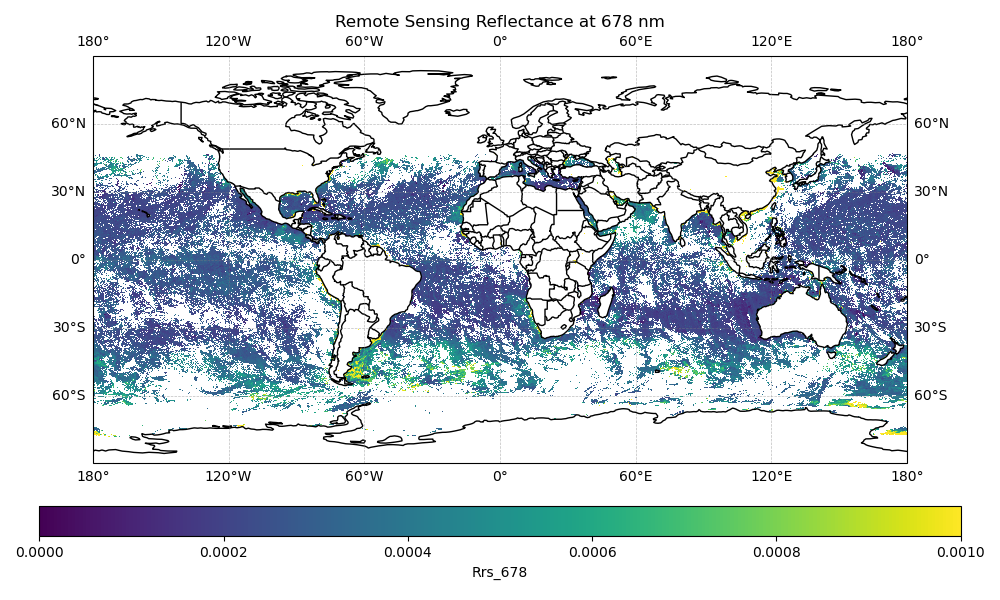

In [12]:
# Assume 'ds' is your xarray Dataset with lat, lon coords and Rrs_678 data variable
# If you need to load it from a file, uncomment and modify the line below:
# ds = xr.open_dataset('path/to/your/dataset.nc')

# Create a figure with a specific projection (here using PlateCarree)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
im = ds.Rrs_678.plot(ax=ax, transform=ccrs.PlateCarree(), 
                     cmap='viridis', add_colorbar=False,
                    vmin=0.0, vmax=0.001)

# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.08, aspect=30)
cbar.set_label('Rrs_678')

# Set the extent of the map if needed
# ax.set_global()  # Uncomment this line for a global view
# Or set a specific extent:
# ax.set_extent([-180, 180, -90, 90])  # [lon_min, lon_max, lat_min, lat_max]

plt.title('Remote Sensing Reflectance at 678 nm')
plt.tight_layout()
plt.show()

## Error

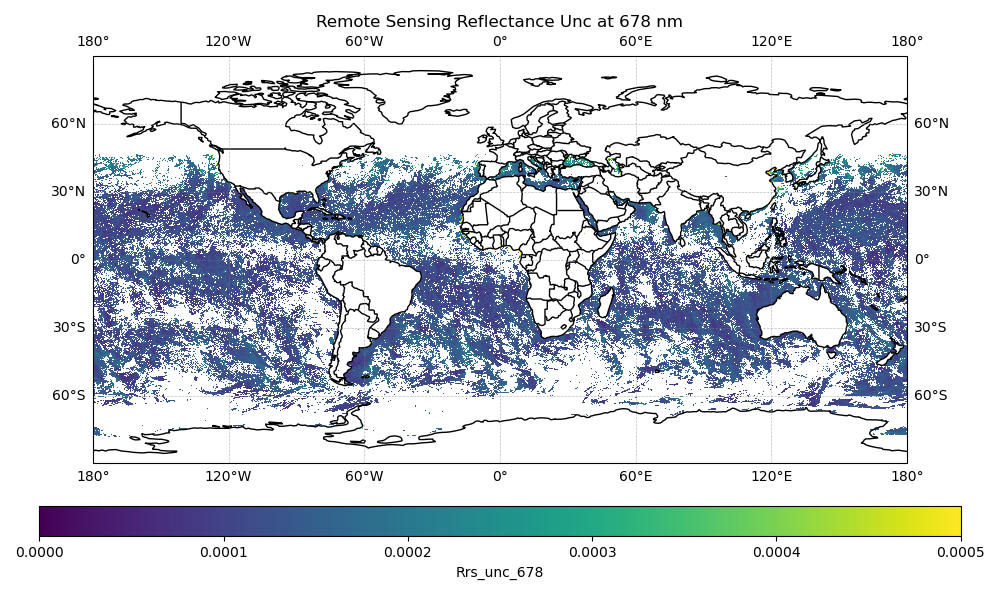

In [15]:
# Create a figure with a specific projection (here using PlateCarree)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
im = ds.Rrs_unc_678.plot(ax=ax, transform=ccrs.PlateCarree(), 
                     cmap='viridis', add_colorbar=False,
                    vmin=0.0, vmax=0.0005)

# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.08, aspect=30)
cbar.set_label('Rrs_unc_678')

# Set the extent of the map if needed
# ax.set_global()  # Uncomment this line for a global view
# Or set a specific extent:
# ax.set_extent([-180, 180, -90, 90])  # [lon_min, lon_max, lat_min, lat_max]

plt.title('Remote Sensing Reflectance Unc at 678 nm')
plt.tight_layout()
plt.show()

## S/N

In [17]:
ds['Rrs_s2n_678'] = ds.Rrs_678 / ds.Rrs_unc_678

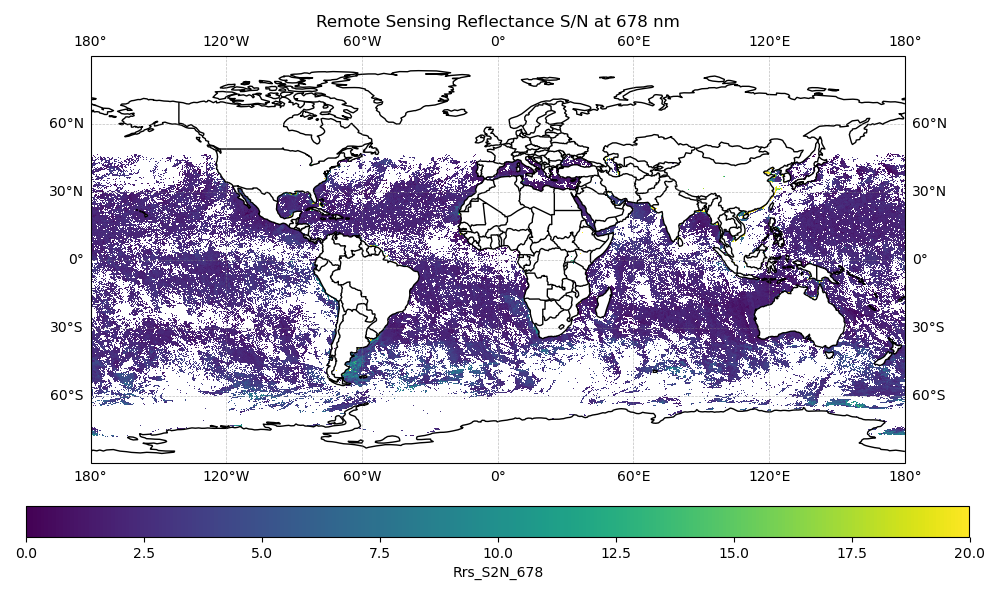

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
im = ds.Rrs_s2n_678.plot(ax=ax, transform=ccrs.PlateCarree(), 
                     cmap='viridis', add_colorbar=False,
                    vmin=0.0, vmax=20)

# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.08, aspect=30)
cbar.set_label('Rrs_S2N_678')

# Set the extent of the map if needed
# ax.set_global()  # Uncomment this line for a global view
# Or set a specific extent:
# ax.set_extent([-180, 180, -90, 90])  # [lon_min, lon_max, lat_min, lat_max]

plt.title('Remote Sensing Reflectance S/N at 678 nm')
plt.tight_layout()
plt.show()

# Now a method

In [20]:
'Rrs_s2n_678' in ds

True

In [25]:
def plot_s2n(wave:str, vmax:float=20):
    # Calc s2n
    s2n_key = f'Rrs_s2n_{wave}'
    if s2n_key not in ds:
        ds[s2n_key] = ds[f'Rrs_{wave}'] / ds[f'Rrs_unc_{wave}']
        
    #
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Plot the data
    im = ds[s2n_key].plot(ax=ax, transform=ccrs.PlateCarree(), 
                         cmap='viridis', add_colorbar=False,
                        vmin=0.0, vmax=vmax)
    
    # Add coastlines and borders
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    
    # Add gridlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.08, aspect=30)
    cbar.set_label(s2n_key)
    
    # Set the extent of the map if needed
    # ax.set_global()  # Uncomment this line for a global view
    # Or set a specific extent:
    # ax.set_extent([-180, 180, -90, 90])  # [lon_min, lon_max, lat_min, lat_max]
    
    plt.title(f'Remote Sensing Reflectance S/N at {wave} nm')
    plt.tight_layout()
    plt.show() 

## 443

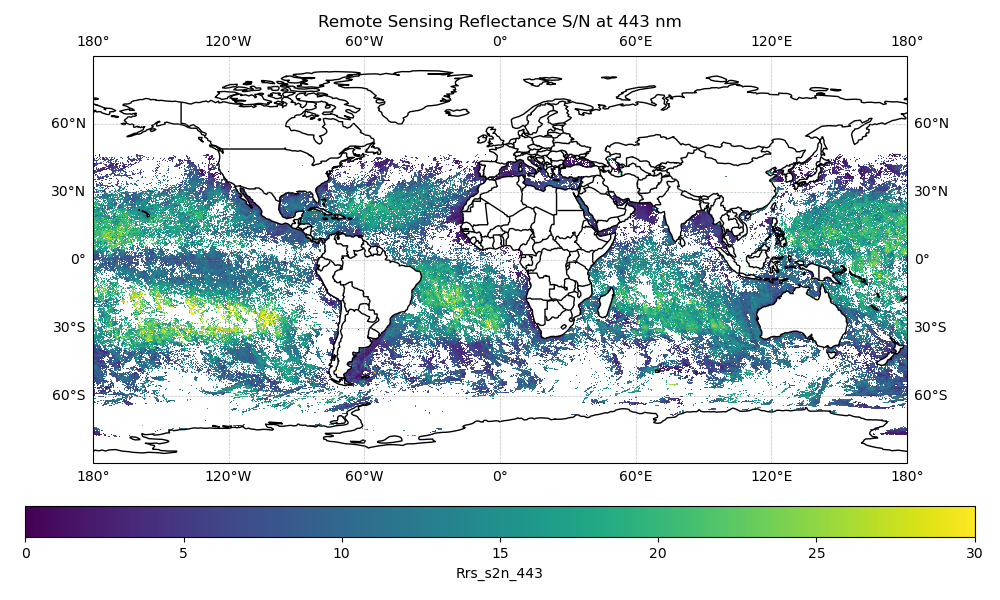

In [26]:
plot_s2n('443', vmax=30.)

### Unc

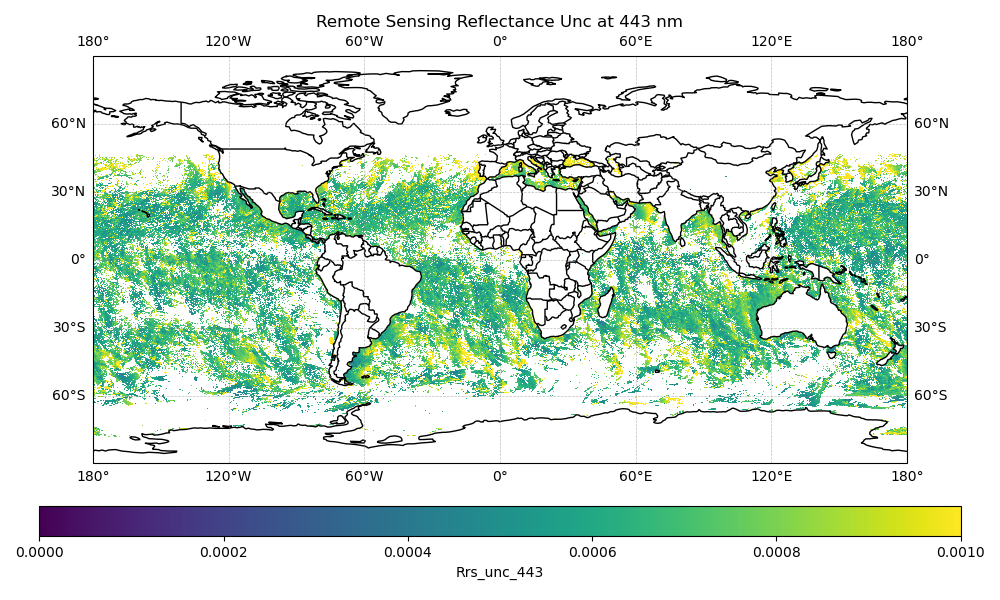

In [28]:
# Create a figure with a specific projection (here using PlateCarree)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
im = ds.Rrs_unc_443.plot(ax=ax, transform=ccrs.PlateCarree(), 
                     cmap='viridis', add_colorbar=False,
                    vmin=0.0, vmax=0.001)

# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.08, aspect=30)
cbar.set_label('Rrs_unc_443')

# Set the extent of the map if needed
# ax.set_global()  # Uncomment this line for a global view
# Or set a specific extent:
# ax.set_extent([-180, 180, -90, 90])  # [lon_min, lon_max, lat_min, lat_max]

plt.title('Remote Sensing Reflectance Unc at 443 nm')
plt.tight_layout()
plt.show()